<a href="https://colab.research.google.com/github/Jayanavya/PersonalMedicalCost_Prediction_Project/blob/main/Medical_Cost_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
path = '/content/drive/MyDrive/PersonalMedicalCostPrediction/insurance.csv'
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


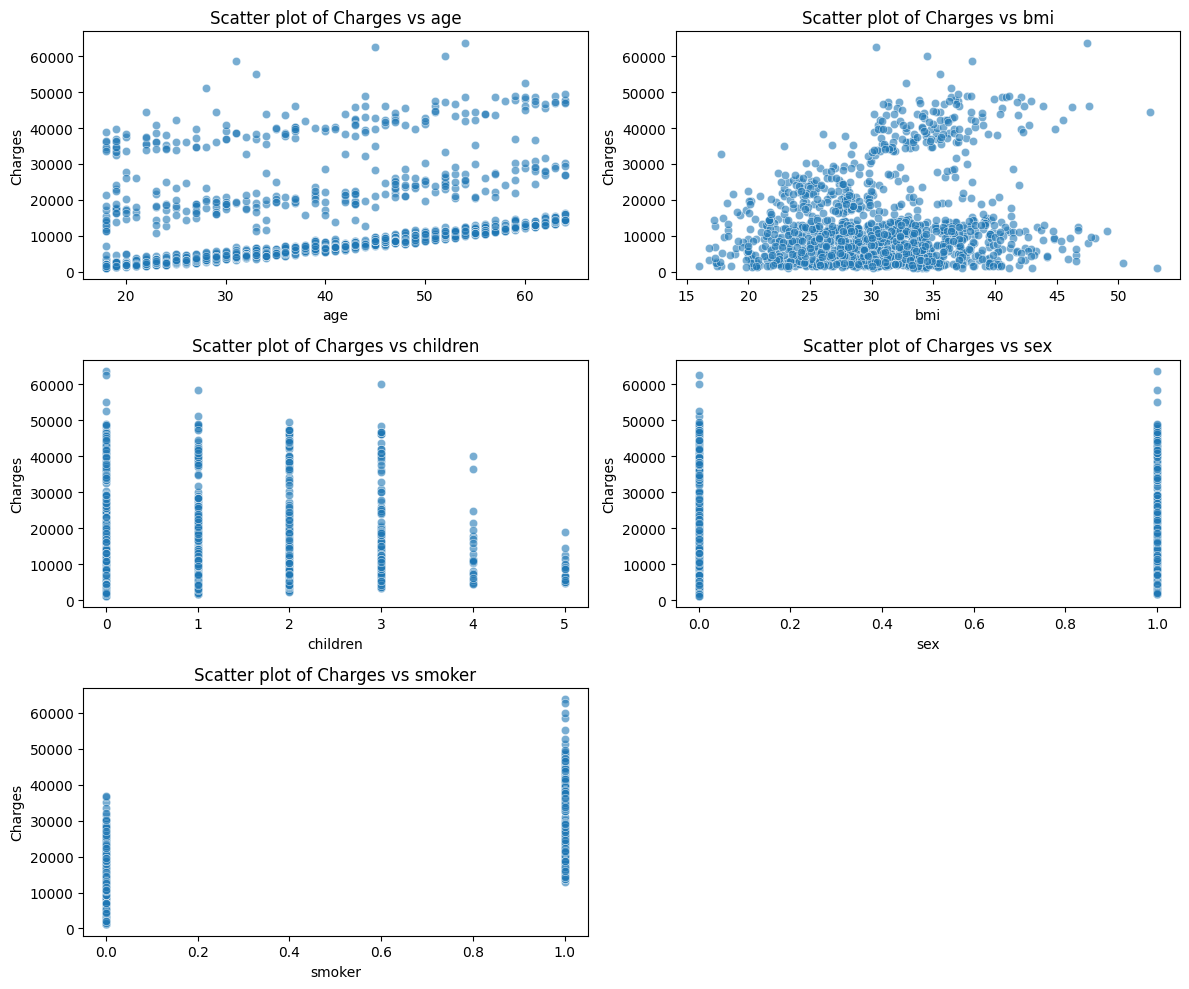

In [11]:
# Convert categorical data to numerical for plotting
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Create scatter plots between 'charges' and each numerical feature
numerical_features = ['age', 'bmi', 'children', 'sex', 'smoker']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='charges', alpha=0.6)
    plt.title(f'Scatter plot of Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')

plt.tight_layout()
plt.show()

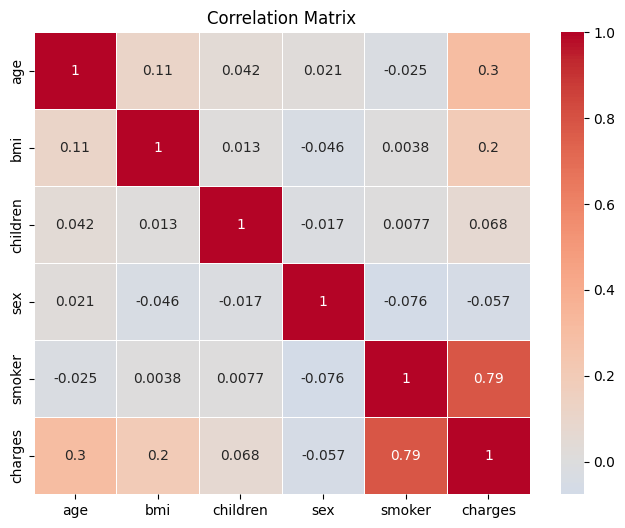

In [12]:
corr_matrix = df[['age', 'bmi', 'children', 'sex', 'smoker', 'charges']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

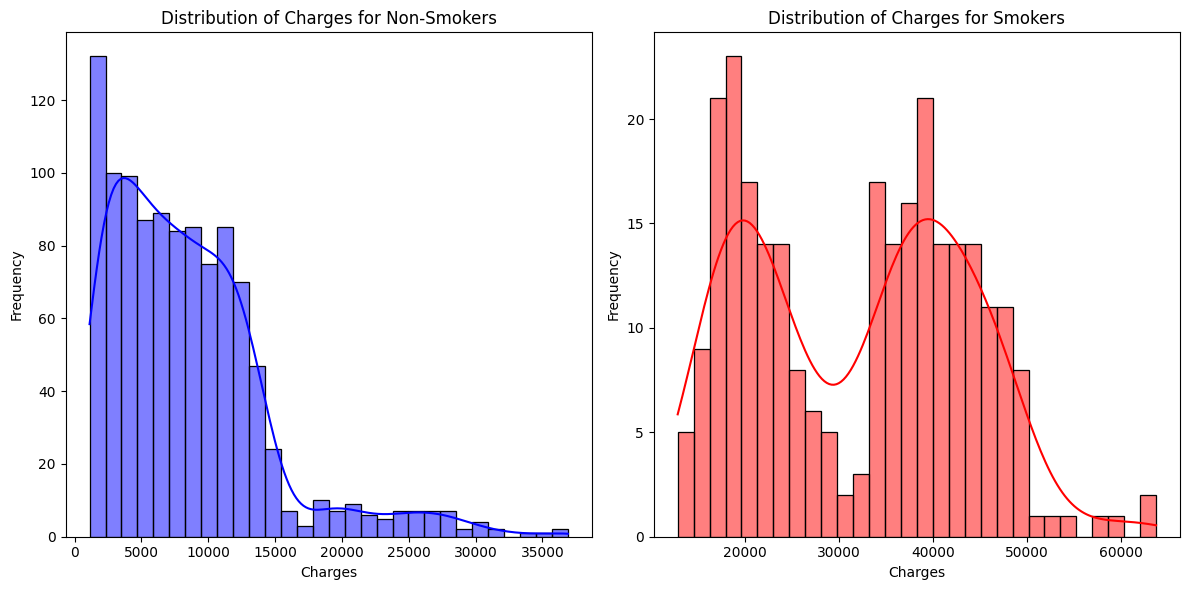

In [13]:
# Create distribution plots for charges of smokers and non-smokers in separate subplots
plt.figure(figsize=(12, 6))

# Subplot for non-smokers
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['smoker'] == 0], x='charges', kde=True, color='blue', bins=30)
plt.title('Distribution of Charges for Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Subplot for smokers
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['smoker'] == 1], x='charges', kde=True, color='red', bins=30)
plt.title('Distribution of Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()